# Simulate stochastic choices

author: steeve laquitaine

This tutorial simulates the stochastic choices generated by a cardinal Bayesian model.

## Setup

In [4]:
# go to the project's root path
import os
os.chdir("..")

In [5]:
# import dependencies
from bsfit.nodes.models.bayes import CardinalBayes
from bsfit.nodes.dataEng import (
    simulate_task_conditions,
)
import pandas as pd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Set the parameters

In [6]:
# set the parameters
PRIOR_SHAPE = "vonMisesPrior"
PRIOR_MODE = 225
OBJ_FUN = "maxLLH"
READOUT = "map"
PRIOR_NOISE = [80, 40]      # e.g., prior's std
STIM_NOISE = [0.33, 0.66, 1.0]
SIM_P = {
    "k_llh": [2.7, 10.7, 33],
    "k_prior": [2.7, 33],
    "k_card": [2000],
    "prior_tail": [0],
    "p_rand": [0],
    "k_m": [2000],
}
GRANULARITY = "trial"
CENTERING = True
N_REPEATS=5

## Simulate task conditions (design matrix)

In [7]:
# simulate task conditions
conditions = simulate_task_conditions(
    stim_noise=STIM_NOISE,
    prior_mode=PRIOR_MODE,
    prior_noise=PRIOR_NOISE,
    prior_shape=PRIOR_SHAPE,
)

The task conditions are shown below:

In [8]:
conditions

,stim_mean,stim_std,prior_mode,prior_std,prior_shape
0,5,0.33,225,80,vonMisesPrior
1,10,0.33,225,80,vonMisesPrior
2,15,0.33,225,80,vonMisesPrior
3,20,0.33,225,80,vonMisesPrior
4,25,0.33,225,80,vonMisesPrior
...,...,...,...,...,...
67,340,1.00,225,40,vonMisesPrior
68,345,1.00,225,40,vonMisesPrior
69,350,1.00,225,40,vonMisesPrior
70,355,1.00,225,40,vonMisesPrior


## Simulate stochastic choices

In [10]:
# instantiate the model
model = CardinalBayes(
    initial_params=SIM_P,
    prior_shape=PRIOR_SHAPE, 
    prior_mode=PRIOR_MODE, 
    readout=READOUT
    )

# simulate stochastic choice predictions
output = model.simulate(
    dataset=conditions,
    granularity=GRANULARITY,
    centering=CENTERING,
    n_repeats=N_REPEATS
)

Running simulation ...

-logl:nan, aic:nan, kl:[ 2.7 10.7 33. ], kp:[ 2.7 33. ], kc:[2000.], pt:0.00, pr:0.00, km:2000.00


The simulated dataset is shown below.

In [11]:
output["dataset"]

,stim_mean,stim_std,prior_mode,prior_std,prior_shape,estimate
0,5,0.33,225,80.0,vonMisesPrior,55
1,5,0.33,225,80.0,vonMisesPrior,23
2,5,0.33,225,80.0,vonMisesPrior,238
3,5,0.33,225,80.0,vonMisesPrior,317
4,5,0.33,225,80.0,vonMisesPrior,237
...,...,...,...,...,...,...
2155,360,1.00,225,40.0,vonMisesPrior,71
2156,360,1.00,225,40.0,vonMisesPrior,67
2157,360,1.00,225,40.0,vonMisesPrior,208
2158,360,1.00,225,40.0,vonMisesPrior,193


### Calculate estimate choice statistics

Running simulation ...

Calculating predictions ...

-logl:12717.25, aic:25452.49, kl:[ 2.7 10.7 33. ], kp:[ 2.7 33. ], kc:[2000.], pt:0.00, pr:0.00, km:2000.00


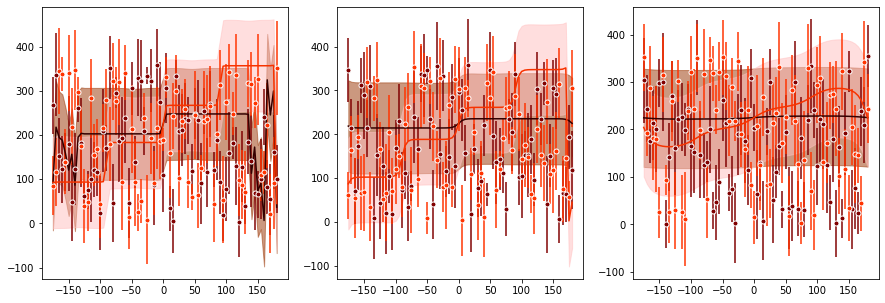

In [12]:
# simulate predictions
from matplotlib import pyplot as plt
plt.figure(figsize=(15,5))
model = model.simulate(
    dataset=output["dataset"],
    sim_p=SIM_P,
    granularity="mean",
    centering=CENTERING,
)

A preview of the unique 431 combinations of task conditions (prior noise, stimulus noise, stimulus feature) is shown below:

In [13]:
pd.DataFrame(output["conditions"]).head()

,0,1,2
0,80.0,0.33,5.0
1,80.0,0.33,10.0
2,80.0,0.33,15.0
3,80.0,0.33,20.0
4,80.0,0.33,25.0


**Model's estimate generative probability density**: the probability that the model generates each estimate is shown below, 
with the estimates ranging from 0 to 359 in the rows and each unique 431 combinations (prior noise, stimulus noise, stimulus feature) in the columns:

In [14]:
pd.DataFrame(output["PestimateGivenModel"]).head()

,0,1,2,3,4,5,6,7,8,9,...,422,423,424,425,426,427,428,429,430,431
0,0.004032,0.003639,0.00324,0.002972,0.002842,0.002795,0.002781,0.002778,0.002778,0.002778,...,0.00275,0.00275,0.002749,0.002749,0.002747,0.002746,0.002745,0.002744,0.002744,0.002744
1,0.004032,0.003639,0.00324,0.002972,0.002842,0.002795,0.002781,0.002778,0.002778,0.002778,...,0.00275,0.00275,0.002749,0.002749,0.002747,0.002746,0.002745,0.002744,0.002744,0.002744
2,0.004032,0.003639,0.00324,0.002972,0.002842,0.002795,0.002781,0.002778,0.002778,0.002778,...,0.00275,0.00275,0.002749,0.002749,0.002747,0.002746,0.002745,0.002744,0.002744,0.002744
3,0.004032,0.003639,0.00324,0.002972,0.002842,0.002795,0.002781,0.002778,0.002778,0.002778,...,0.00275,0.00275,0.002749,0.002749,0.002747,0.002746,0.002745,0.002744,0.002744,0.002744
4,0.004032,0.003639,0.00324,0.002972,0.002842,0.002795,0.002781,0.002778,0.002778,0.002778,...,0.00275,0.00275,0.002749,0.002749,0.002747,0.002746,0.002745,0.002744,0.002744,0.002744


Here is a list of the attributes generated by the simulation:

In [15]:
list(output.keys())

['PestimateGivenModel',
 'map',
 'conditions',
 'prediction_mean',
 'prediction_std',
 'dataset']

Tutorial complete !